In [136]:
from sklearn.datasets import load_diabetes
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

#sklearn.datasets의 load_diabetes에서 데이터를 가져와주세요.
diabetes = load_diabetes()

#diabetes의 data를 df_X에, target을 df_y에 저장해주세요.
df_X = pd.DataFrame(data=diabetes.data, columns=diabetes.feature_names)
df_y = pd.Series(data=diabetes.target, name="target") #값이 한개일때는 Series를 쓰는게 유리

In [137]:
df_X_num = df_X.to_numpy() #df_X에 있는 값들을 numpy array로 변환해서 저장해주세요.

In [138]:
df_y_num = df_y.to_numpy() #df_y에 있는 값들을 numpy array로 변환해서 저장해주세요.

In [139]:
X_train, X_test, y_train, y_test = train_test_split(df_X_num, df_y_num, test_size=0.2, random_state=42)

In [140]:
df_X.head(5) #feature 10개

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641


In [141]:
W = np.random.randn(10)
b = np.random.randn()

In [142]:
def model(X, W, b):
    predictions = 0
    for i in range(10):
        predictions += X[:, i] * W[i]
    predictions += b
    return predictions

In [143]:
#손실함수를 MSE 함수로 정의해주세요.
def MSE(a,b):
    mse = ((a-b) **2).mean()
    return mse
def loss(X, W, b, y):
    predictions = model(X, W, b)
    L = MSE(predictions, y)
    return L

In [144]:
def gradient(X, W, b, y):        #gradient함수 구현해주세요
    # N은 데이터 포인트의 개수
    N = len(y)
    
    # y_pred 준비
    y_pred = model(X, W, b)
    
    # 공식에 맞게 gradient 계산
    dW = 1/N * 2 * X.T.dot(y_pred - y)
        
    # b의 gradient 계산
    db = 2 * (y_pred - y).mean()
    return dW, db


In [145]:
LEARNING_RATE = 0.5

In [146]:
losses = [] #학습해보기
for i in range(1, 1001):
    dW, db = gradient(X_train, W, b, y_train)
    W -= LEARNING_RATE * dW
    b -= LEARNING_RATE * db
    L = loss(X_train, W, b, y_train)
    losses.append(L)
    if i % 10 == 0:
        print('Iteration %d : Loss %0.4f' % (i, L))

Iteration 10 : Loss 5706.7630
Iteration 20 : Loss 5388.7363
Iteration 30 : Loss 5116.2756
Iteration 40 : Loss 4882.1950
Iteration 50 : Loss 4680.4795
Iteration 60 : Loss 4506.0924
Iteration 70 : Loss 4354.8138
Iteration 80 : Loss 4223.1069
Iteration 90 : Loss 4108.0052
Iteration 100 : Loss 4007.0192
Iteration 110 : Loss 3918.0580
Iteration 120 : Loss 3839.3643
Iteration 130 : Loss 3769.4595
Iteration 140 : Loss 3707.0985
Iteration 150 : Loss 3651.2315
Iteration 160 : Loss 3600.9722
Iteration 170 : Loss 3555.5713
Iteration 180 : Loss 3514.3946
Iteration 190 : Loss 3476.9039
Iteration 200 : Loss 3442.6421
Iteration 210 : Loss 3411.2199
Iteration 220 : Loss 3382.3050
Iteration 230 : Loss 3355.6132
Iteration 240 : Loss 3330.9007
Iteration 250 : Loss 3307.9577
Iteration 260 : Loss 3286.6033
Iteration 270 : Loss 3266.6808
Iteration 280 : Loss 3248.0540
Iteration 290 : Loss 3230.6046
Iteration 300 : Loss 3214.2285
Iteration 310 : Loss 3198.8347
Iteration 320 : Loss 3184.3427
Iteration 330 : L

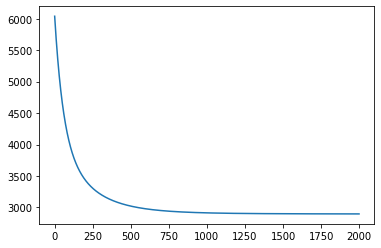

In [147]:
import matplotlib.pyplot as plt
plt.plot(losses)
plt.show()

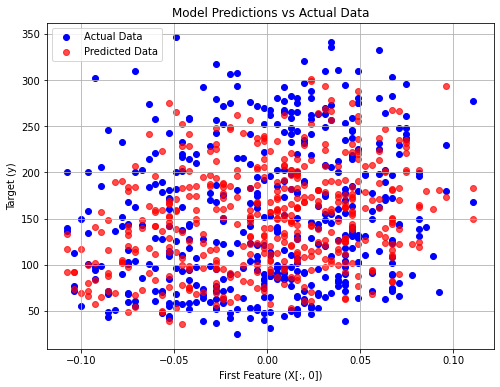

In [148]:
# X 데이터의 첫 번째 컬럼
X_first_num = df_X_num[:, 0]  # 첫 번째 컬럼 (age feature)

# 모델을 사용해 예측값 계산
y_pred = model(df_X_num, W, b)

# 그래프 그리기
plt.figure(figsize=(8, 6))
plt.scatter(X_first_num, df_y_array, color="blue", label="Actual Data")  # 실제 타겟 데이터
plt.scatter(X_first_num, y_pred, color="red", alpha=0.7, label="Predicted Data")  # 예측된 데이터
plt.title("Model Predictions vs Actual Data")
plt.xlabel("First Feature (X[:, 0])")
plt.ylabel("Target (y)")
plt.legend()
plt.grid()
plt.show()

In [149]:
mse

19198.351968223596